**Thinkful - Challenge - What Do You See?**

**Introduction**

One way to benchmark building energy performance is via an Energy Star score. The score is provided on a scale of 1 to 100, where higher scores represent higher-performing buildings. Another metric used to characterize building enery use is the energy use intensity (EUI), which is the total annual energy consumption of a building divided by its floor area (units of kBtu/SF-yr). 

**Scatter Plot**

The graph of Energy Star score vs building EUI for buildings in San Francisco is shown below. This graph shows us that:

* The building EUI increases exponentially as the Energy Star score decreases.
* The range of EUIs is greater at lower Energy Star scores as compared to higher scores.

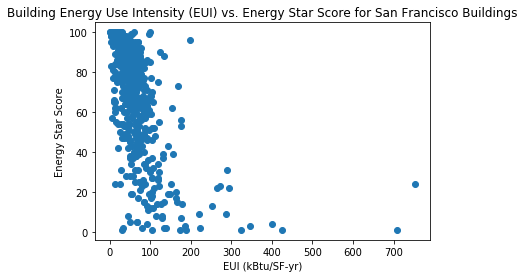

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('San_Francisco_Building_Data.csv')
x = df['SiteEUI']
y = df['ENERGY_STAR_Score']

%matplotlib inline
plt.scatter(x,y)
plt.xlabel('EUI (kBtu/SF-yr)')
plt.ylabel('Energy Star Score')
plt.title('Building Energy Use Intensity (EUI) vs. Energy Star Score for San Francisco Buildings')
plt.show()

**Boxplot**

The boxplot below assesses the variability in building EUIs for lower Energy Star scores. To further analyze the variability in building EUIs at lower Energy Star scores, the data was subdivided into 20-point bins for the Energy Star score. The boxplots for each bin below show that:

* In general, the median EUI (shown by the red line in each box) for each bin doesn't vary significantly between bins.
* The range of EUIs for each bin *does* vary significantly between each bin, which is indicated by the fact that the error bars are longer for the lower bins as compared to the higher bins.
* The fact that there are outliers above the box whiskers but not below them indicates that the data is skewed and not normal.

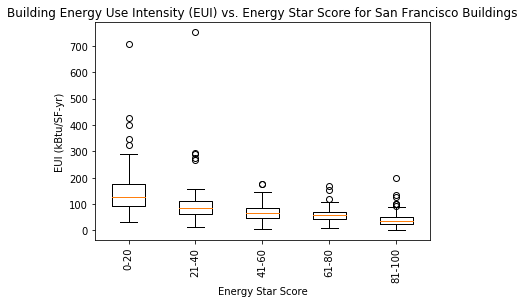

In [5]:
df = pd.read_csv('San_Francisco_Building_Data.csv')
x = df['ENERGY_STAR_Score']
y = df['SiteEUI']

fig = plt.figure()
ax = fig.add_subplot(111)

a = y[x<21]
b = y[(x > 20) & (x <= 40)]
c = y[(x > 40) & (x <= 60)]
d = y[(x > 60) & (x <= 80)]
e = y[(x > 80) & (x <= 100)]

label_names = ['0-20','21-40','41-60','61-80','81-100']
plt.ylabel('EUI (kBtu/SF-yr)')
plt.xlabel('Energy Star Score')
plt.title('Building Energy Use Intensity (EUI) vs. Energy Star Score for San Francisco Buildings')
ax.boxplot([a,b,c,d,e])
ax.set_xticklabels(label_names,rotation=90)
plt.show()

**Grouped Bar Chart**

The graph below shoes the average EUIs for various building types for three electric utility providers in California including PG&E, SCE, and SDG&E. This graph shows that:

* The building EUIs do not vary significantly between electric utility providers (and by extension geographical areas) in California.
* The EUIs of restaurants are much higher than the second-highest building category, which are grocery stores (labeled "Food Stores" below).

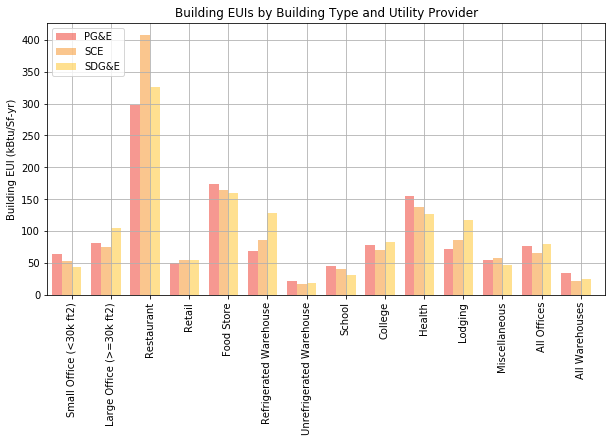

In [6]:
df = pd.read_csv('CaliforniaEUI.csv')
BuildingType = df['BuildingType']
PGE = df['PG&E']
SCE = df['SCE']
SDGE = df['SDG&E']

# Setting the positions and width for the bars
pos = list(range(len(df['PG&E'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create bars with score data
plt.bar(pos,df['PG&E'],width,alpha=0.5,color='#EE3224',label=df['BuildingType'][0])
plt.bar([p + width for p in pos],df['SCE'],width,alpha=0.5,color='#F78F1E',label=df['BuildingType'][1])
plt.bar([p + width*2 for p in pos],df['SDG&E'],width,alpha=0.5,color='#FFC222',label=df['BuildingType'][2])

# Plot attributes
ax.set_ylabel('Building EUI (kBtu/Sf-yr)')
ax.set_title('Building EUIs by Building Type and Utility Provider')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df['BuildingType'],rotation=90)
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['SCE']+20)] )
plt.legend(['PG&E', 'SCE', 'SDG&E'], loc='upper left')
plt.grid()
plt.show()

**Stacked Bar Chart**

The graph below shows the average end use breakdown (how energy is allocated for various uses in a building) of the building groups shown above. This graph shows that:

* The reason that energy use is so much higher for restaurants as compared to other buildings is due to cooking.
* The energy use of the second-highest energy use category, grocery stores, is due to refrigeration.

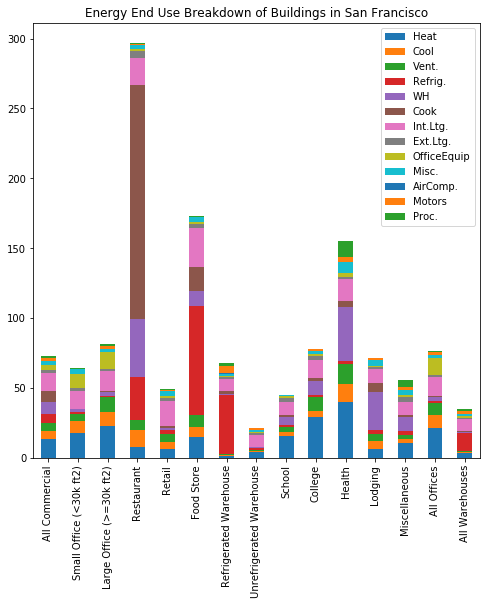

In [3]:
df = pd.read_csv('PGE_EndUseBreakdown.csv')
BuildingType = df['BuildingType']
ax = df.drop(['Total'],axis=1).plot(kind='bar',stacked=True,rot=1,figsize=(8,8),title='Energy End Use Breakdown of Buildings in San Francisco')
ax.set_xticklabels(BuildingType,rotation=90)
plt.show()

**Sources**

1. San Francisco Benchmarking Report 
    http://uli.org/wp-content/uploads/ULI-Documents/SFenergybenchmarkingreport.pdf

2. California Commercial End Use Survey
http://www.energy.ca.gov/2006publications/CEC-400-2006-005/CEC-400-2006-005.PDF

3. Creating Grouped Bar Plots
https://chrisalbon.com/python/matplotlib_grouped_bar_plot.html

4. Creating Sacked Bar Charts
https://chrisalbon.com/python/matplotlib_stacked_bar_plot.html